In [1]:
import numpy as np
import PIL
import random
from PIL import Image
from PIL import ImageDraw

In [2]:
## Find the endpoint of a line segment with given start coordinate (x,y), angle (in radians) and distance
### returns endpoint with x and y values rounded to (closest?) integer, optional argument if angle given in degrees
def line_segment_endpoint(coord, angle, dist, degrees = False):
    if degrees == True:
        angle = angle * np.pi/180
        return (int(dist*np.cos(angle) + coord[0]), int(dist*np.sin(angle) + coord[1]))
    else:
        return (int(dist*np.cos(angle) + coord[0]), int(dist*np.sin(angle) + coord[1]))

In [3]:
def dist(p1,p2):
    dist = np.sqrt((p2[0]-p1[0])**2 + (p2[1]-p1[1])**2)
    return dist

In [4]:
##
def midpoint(p1,p2):
    return (int(p2[0]+p1[0]/2), int(p2[1]+p1[1]/2))

In [5]:
## Take a rectangle, partition it into two pieces, either vertically or horizontally, giving two rectangles in which the same can be done, on a given partition
## Have a chance that on any given partition, have a chance to color the space with a color out of a specific palette
## draw is a drawable object using PIL library
## palette is a list of colors of RGB or RGBA format, palette[0] will be used as the default if no color choice is selected, palette[1] is the bordercolor
## rects is a list of coordinate pairs [(p1,p2), (p1,p2)] where p1 is the upper left coordinate of the rectangle and p2 is the lower right
## width determine the width of the rectangular partitions border

## probs dictactes the various probabilities of being colored and where to partition, [color_chance, partition_chance]
#### color_chance is in [0,1.0)
#### partition_chance = is in [0, 1.0)

def partition_rectangles(draw, palette, rects, color_chance, partition_chance, width, iterations):
    if iterations == 0:
        return "Done"
    new_rects = []
    for rect in rects:
        try:
            #decide if it will be colored and then color it the default or new color
            color_prob = random.random()
            if color_prob < color_chance:
                color_choice = random.choice(palette[2:])
            else:
                color_choice = palette[0]
            #rect is of the form (p1,p2)
            p1, p2 = rect[0], rect[1]
            # rectangle(xy, fill=None, outline=None, width=0)
            draw.rectangle([p1,p2], fill = color_choice, outline = palette[1], width = width)
        
            #Determine if this rectangle will be partitioned and if so will it be horizontal?
            rect_prob = random.random()
            if rect_prob < partition_chance:
                #It has been decided that a partition is made
                #the chance of it being horizontal is height/(width+height)
                horiz_prob = random.random()
                height_frac = (p2[1]-p1[1])/((p2[1]-p1[1])+(p2[0]-p1[0]))
                if horiz_prob < height_frac:
                    y_loc = random.randint(p1[1],p2[1])
                    new_rects.append( (p1,(p2[0],y_loc)) )
                    new_rects.append( ((p1[0],y_loc),p2) )
                else:
                    x_loc = random.randint(p1[0], p2[0])
                    new_rects.append( (p1, (x_loc,p2[1])) )
                    new_rects.append( ((x_loc,p1[1]),p2) )
        except: continue
    return partition_rectangles(draw, palette, new_rects, color_chance, partition_chance, width, iterations-1)

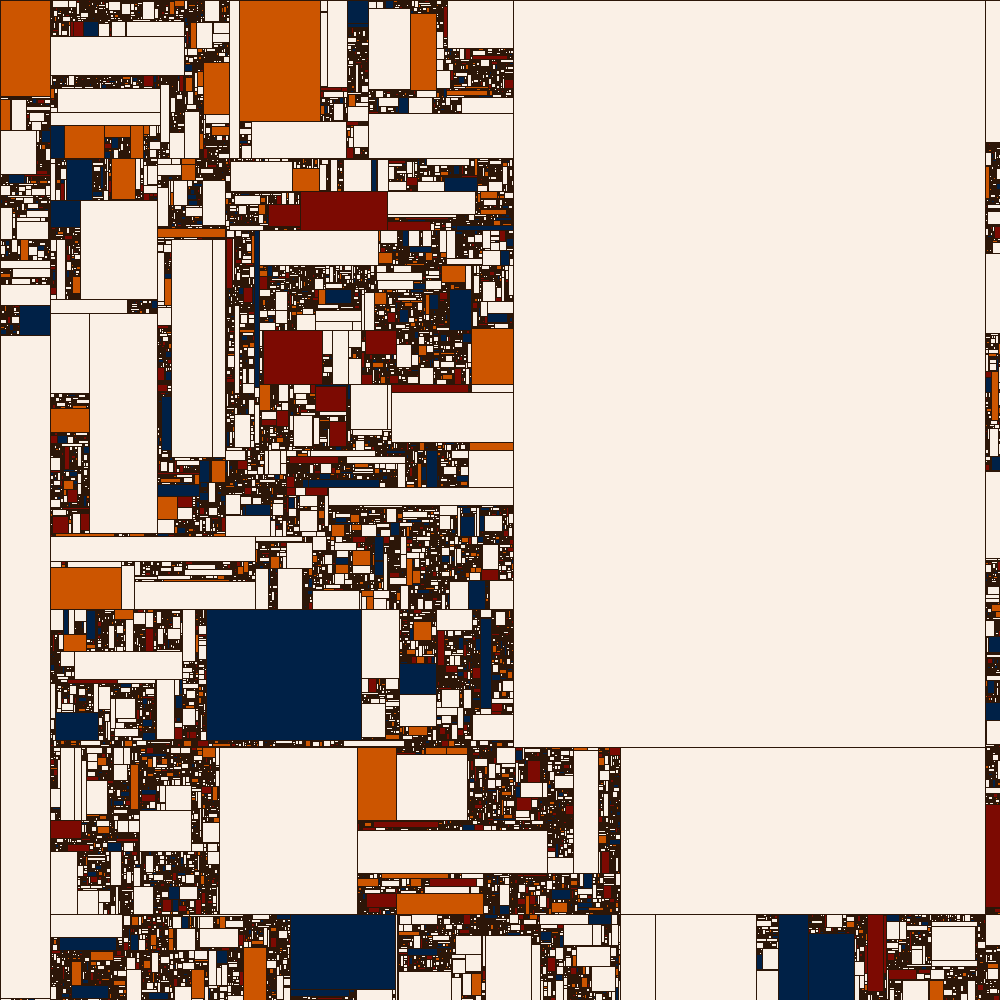

In [6]:
image = Image.new("RGBA", (1000,1000), (0,0,0,0))
draw = ImageDraw.Draw(image)
palette = [(250,240,230,255), (44,22,8,255), (124,10,2), (0,33,71), (204,85,0)]
color_chance = 0.35
partition_chance = 0.90
width = 1
iterations = 80
start_pts = [((0,0),(1000,1000))]
partition_rectangles(draw,palette,start_pts, color_chance, partition_chance, width, iterations)
image

In [15]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import PIL
from sklearn.cluster import KMeans
%matplotlib inline

## using K-means Clustering, pull a palette of size N of the most prominent colors of an image.
## outputs the palette for use in other projects
## converts the palette to a list of colors of form (R,G,B)
def strip_palette(image, size):
    #Open the image using openCV and convert to RGB
    img = cv.imread(image)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
    #Little hazy at this point forward but create clusters on my image reshaped to be a vector whose entries are RBG colors
    clt = KMeans(n_clusters = size)
    clt.fit(img.reshape(-1,3))
    palette = []
    for color in clt.cluster_centers_:
        R, G, B = int(color[0]), int(color[1]), int(color[2])
        palette.append((R,G,B))
    return palette

In [16]:
palette = strip_palette("wassily-kandinsky-4.jpg", 20)
palette

[(41, 47, 56),
 (207, 205, 212),
 (101, 164, 207),
 (23, 63, 173),
 (210, 159, 74),
 (70, 95, 91),
 (26, 27, 33)]

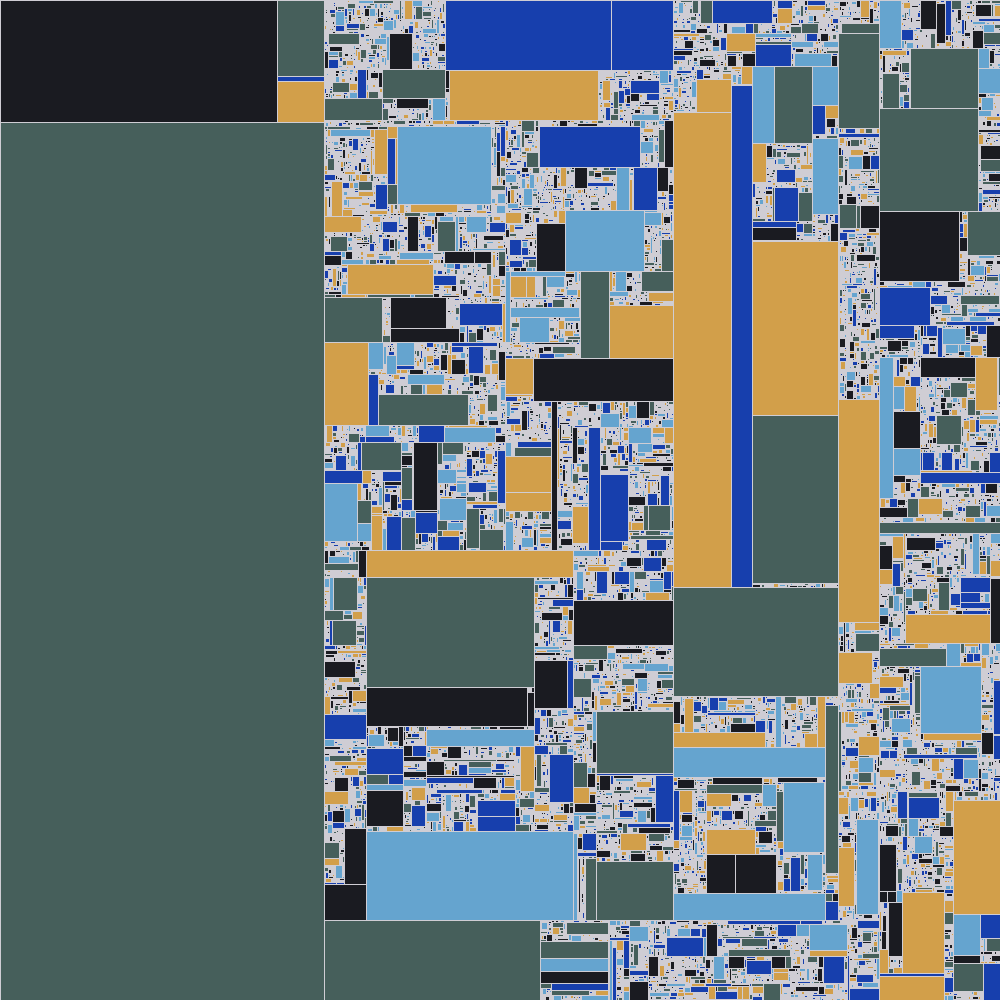

In [18]:
image = Image.new("RGBA", (1000,1000), (0,0,0,0))
draw = ImageDraw.Draw(image)
color_chance = 1
partition_chance = 0.90
width = 1
iterations = 70
start_pts = [((0,0),(1000,1000))]
partition_rectangles(draw,palette,start_pts, color_chance, partition_chance, width, iterations)
image

In [20]:
image.save("kandinsky_parts_100_90_70.png")

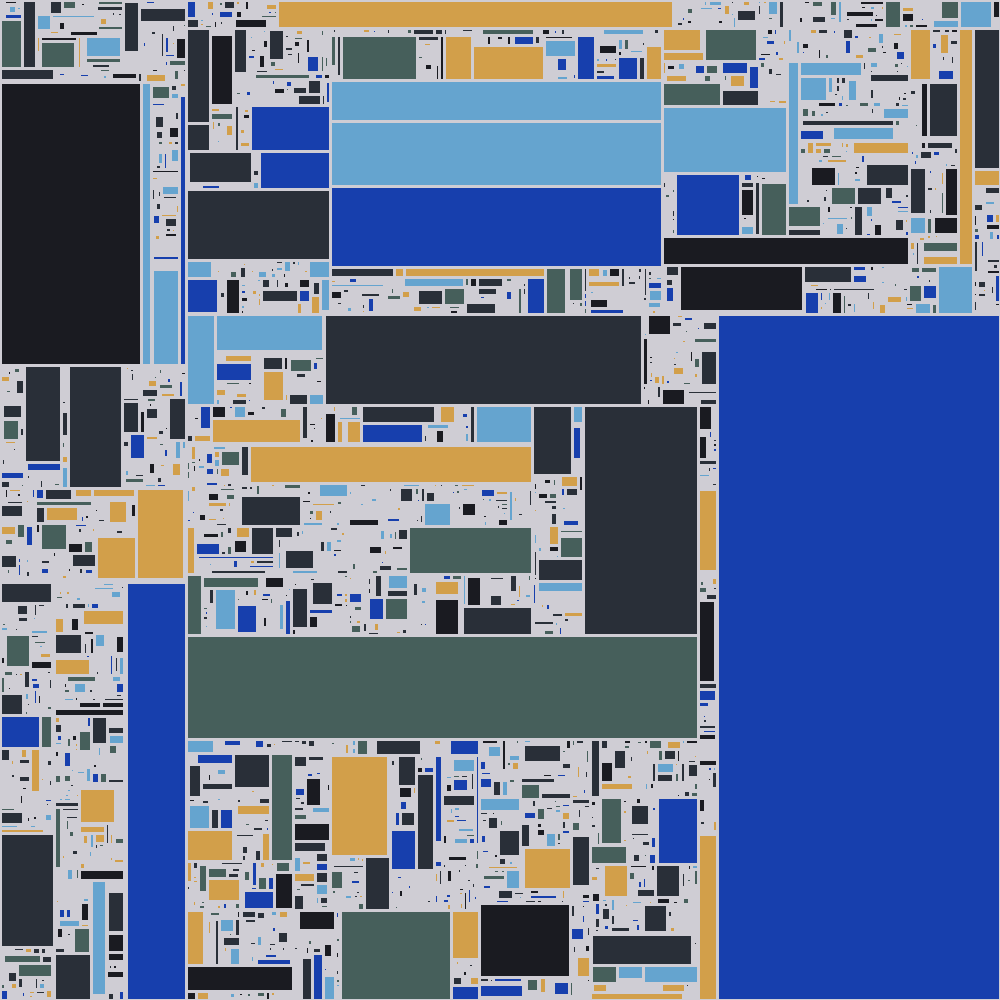

In [23]:
image = Image.new("RGBA", (1000,1000), (0,0,0,0))
draw = ImageDraw.Draw(image)
color_chance = 0.70
partition_chance = 0.90
width = 2
iterations = 60
start_pts = [((0,0),(1000,1000))]
partition_rectangles(draw,palette,start_pts, color_chance, partition_chance, width, iterations)
image

In [24]:
image.save("kandinsky_parts_70_90_70_wide.png")

In [25]:
palette = strip_palette("wassily-kandinsky-4.jpg", 13)
palette

[(213, 217, 223),
 (53, 64, 72),
 (23, 63, 174),
 (34, 37, 45),
 (207, 169, 58),
 (165, 195, 198),
 (41, 48, 57),
 (151, 93, 65),
 (18, 18, 19),
 (91, 159, 214),
 (241, 225, 131),
 (62, 111, 111),
 (232, 154, 206)]

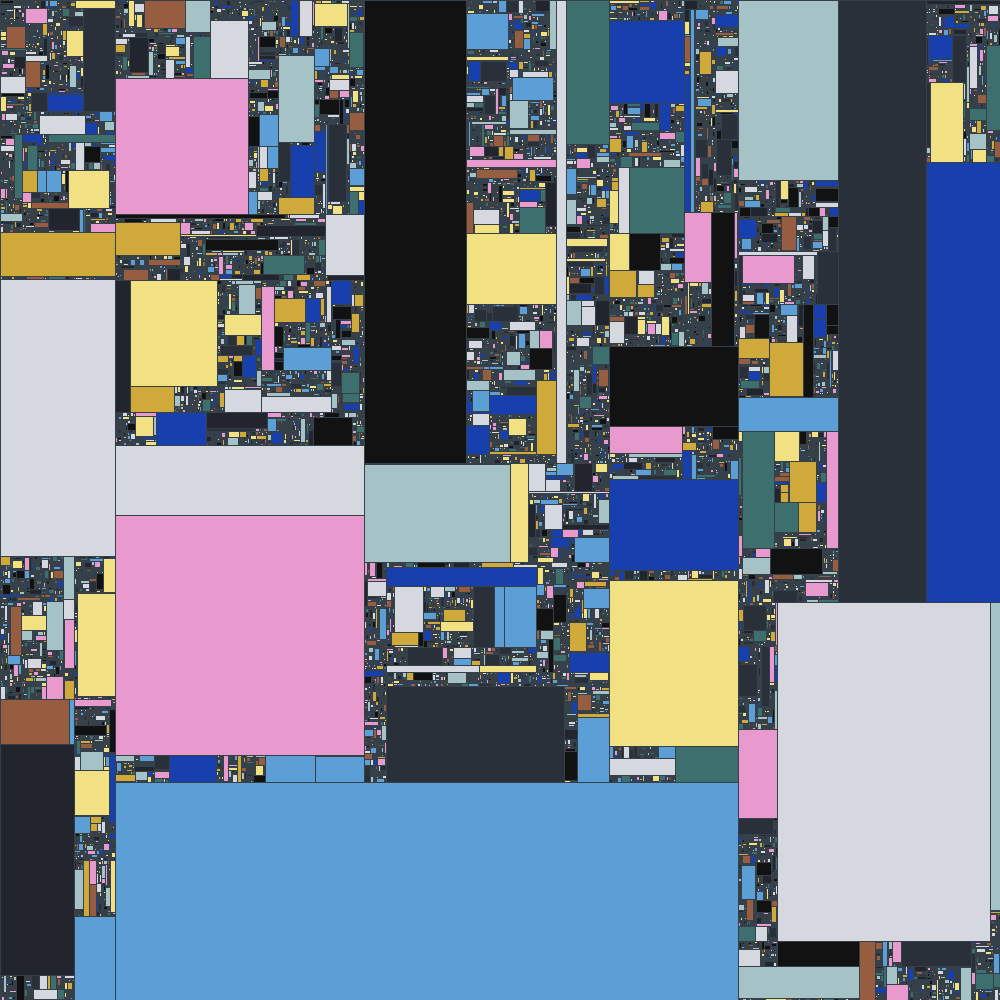

In [26]:
image = Image.new("RGBA", (1000,1000), (0,0,0,0))
draw = ImageDraw.Draw(image)
color_chance = .90
partition_chance = 0.90
width = 1
iterations = 40
start_pts = [((0,0),(1000,1000))]
partition_rectangles(draw,palette,start_pts, color_chance, partition_chance, width, iterations)
image

In [28]:
image.save("kandinsky_circles_rectangles_90_90_40.png")